In [1]:
#%qtconsole
%matplotlib inline
# %matplotlib nbagg
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

import scipy.io
from scipy import misc
from skimage import io
from scipy.misc import imresize
from scipy.misc import imrotate
from scipy import signal
import exifread
import json
import tifffile as tiff
from PIL import Image

# local imports
from filesSelector import *
from aux_func_omer import *

In [2]:
imCombineSel = SelectFilesButton()
imCombineSel

#print(filesSelector.files)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [3]:
import re
def extract_file_number(f):
    # assuming xxx_Pos<number>.yyy
    f2 = f.split('Pos')[1].split('.')[0]
    s = re.findall("\d+$",f2)
    return (int(s[0]) if s else -1,f)

def get_comp_data(data,point,rad_size):
    return np.average(data[:,point[0]-rad_size:point[0]+rad_size,point[1]-rad_size:point[1]+rad_size],axis=(1,2))

def get_images(path):
    from os import listdir
    from os.path import isfile, join
    file_list= [f for f in listdir(path) if isfile(join(path, f))]
    return sorted( file_list,key=extract_file_number)


In [6]:

# 10X Olympus
#scale = 0.495 # 10X, bining 4X4
scale = 0.912   # 0.990 10X, bining 2X2
resize = 100 #percent
deg = 0 #-2.2
fov_corr_path = 'FOV_gfp_corr_lens10x_bining2x2_21_01_18_inv.npy'

# 40X
# scale = 5 # 40X, bining 1x1
# resize = 20 #percent
# deg = -1.5

# bf fov corr
# fov_cor_mag = 0.04
# fov_cor_shift= 1
# gfp fov corr
fov_cor_mag = 0.025
fov_cor_shift= 1

path = r'C:\Users\omersha\Desktop\20181010\\'
pic_path = path + r'bf_2x2_ndf2_200ms_1\\'
files = [pic_path+f for f in get_images(pic_path)]
save_path = path + 'bf_combined.tif'
I =combine_single_im(files,scale,resize,deg,save_path,fov_corr_path,fov_cor_mag,fov_cor_shift,flipx=True)


frames = [0,300] 
#save_path = 'C:\\Users\\omersha\\Dropbox (Weizmann)\\exp log\\test\\singles_green.tif'
# save_path = 'C:\\Users\\omersha\\Desktop\\20180815\\analysis\\180815_scan_w6_exp.tif'
#save_path = 'C:\\Users\\omersha\\Dropbox (Weizmann)\\exp log\\210318\\red.tif'





I = combine_single_im(imCombineSel.files,scale,resize,deg,save_path,fov_corr_path,fov_cor_mag,fov_cor_shift,flipx=True)
#I =     combine_im_seq(imCombineSel.files,scale,resize,deg,save_path,fov_corr_path,fov_cor_mag,fov_cor_shift,True,frames)
# f= plt.figure(figsize=(12,7))
# plt.imshow(I[0],cmap = 'gray')


I_shape: (1080, 1280)
a
image size: [ 1198 10463]
marker abs pos (px): [0, 0]
pos: 0, pix =[[118, 0], [1198, 1280]]
pos: 1, pix =[[118, 408], [1198, 1688]]


C:\Users\omersha\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1752: UserWarning: ome-xml: not an ome-tiff master file
  warnings.warn("ome-xml: not an ome-tiff master file")


pos: 2, pix =[[0, 1347], [1080, 2627]]
pos: 3, pix =[[0, 2115], [1080, 3395]]
pos: 4, pix =[[0, 3010], [1080, 4290]]
pos: 5, pix =[[0, 3923], [1080, 5203]]
pos: 6, pix =[[0, 5054], [1080, 6334]]
pos: 7, pix =[[24, 6780], [1104, 8060]]
pos: 8, pix =[[24, 7408], [1104, 8688]]
pos: 9, pix =[[24, 8094], [1104, 9374]]
pos: 10, pix =[[24, 9183], [1104, 10463]]


C:\Users\omersha\Google Drive\Master thesis\DataAnalysis\aux_func_omer.py:156: RuntimeWarning: invalid value encountered in true_divide
  I = I/Iw[np.newaxis]


IndexError: list index out of range

In [ ]:

pic = imrotate(np.nan_to_num(I[0]),-0.5)#[60:1200,50:13000]
# f= plt.figure(figsize=(18,7))
# plt.imshow(pic,clim=[pic.min(),pic.max()])


im = Image.fromarray(pic)
im.save(save_path[:-3]+'png')


In [13]:
#singles_v3_exp2
scale = 0.99   # 0.990 10X, bining 2X2
resize = 100 #percent
deg = 1.5

imgroup = np.empty((7,2),dtype='uint')
imgroup[0] = np.array([0,4])
imgroup[1] = np.array([4,9])
imgroup[2] = np.array([9,13])
imgroup[3] = np.array([13,17])
imgroup[4] = np.array([17,22])
imgroup[5] = np.array([21,26])
imgroup[6] = np.array([25,29])

# bf fov corr
# fov_cor_mag = 0.04
# fov_cor_shift= 1
# gfp fov corr
# for i in range(7):
#     save_path = 'C:\\Users\\omersha\\Desktop\\08_01_18_singels_try2\\analysis\\group%d_green.tif'%i
#     I = combine_single_im(imCombineSel.files[imgroup[i,0]:imgroup[i,1]]
#                           ,scale,resize,deg,save_path,fov_corr_path,fov_cor_mag,fov_cor_shift)
#     tiff.imsave(data=I.astype(I_type),file=save_path)



# frames = [1,299] 
# fov_cor_mag = 0.005
# fov_cor_shift= 1
# fov_corr_path = 'FOV_gfp_corr_lens10x_bining2x2_21_01_18_inv.npy'
# for i in range(6,7):
#     save_path = 'C:\\Users\\omersha\\Desktop\\08_01_18_singels_try2\\analysis\\group%d_exp.tif'%i
#     I = combine_im_seq(imCombineSel.files[imgroup[i,0]:imgroup[i,1]]
#                           ,scale,resize,deg,save_path,frames,fov_corr_path,fov_cor_mag,fov_cor_shift)
#     print('saving file')
#     tiff.imsave(data=I.astype(I_type),file=save_path)


In [16]:
save_path = 'C:\\Users\\omersha\\Desktop\\25_12_18_pos0_exp4_2.tif'
fov_corr_inv = imresize(np.load(fov_corr_path),resize)*fov_cor_mag+fov_cor_shift
tiff.imsave(data=np.multiply(io.imread(imCombineSel.files[0]).astype('uint16'),fov_corr_inv[np.newaxis]),file=save_path)
print("done")



C:\Users\omersha\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1752: UserWarning: ome-xml: not an ome-tiff master file
  warnings.warn("ome-xml: not an ome-tiff master file")


done


In [51]:
I_type = 'uint16'
tiff.imsave(data=I.astype(I_type),file=save_path)

<IPython.core.display.Javascript object>


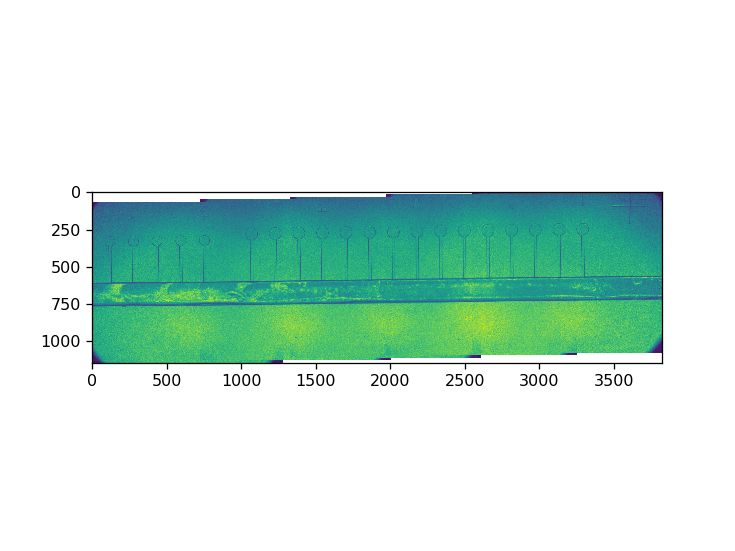

In [52]:
plt.imshow(I[0])

In [ ]:
I_type = io.imread(filesSelector.files[0])[0].dtype
#a=imrotate(I[0],-12)
#a[234:990,300:7200]
tiff.imsave(data=I.astype(I_type),file=save_path)
#tiff.imsave(data=imrotate(I[0].astype('uint16'),1).astype('uint16'),file=save_path)



In [ ]:
a = tiff.imread('dna_06_11_17.tif')
a.dtype
plt.imshow(I[0])

In [ ]:
import imageio
imageio.mimwrite('circ_fill_beads_30nm.mp4', I , fps = 7)

In [ ]:
np.save('test',I_new)

In [ ]:
resize_factor = 100
im =[]
for i in range(0,8):
    im.append(imresize(io.imread(filesSelector.files[i]),resize_factor))